In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

Teremos uma representação gráfica que nos ajudará a compreender a técnica que usaremos nesta aula para remoção de outliers. Estamos utilizando Box-plot, que possui a seguinte configuração: temos uma mediana, em que dividimos os dados em 50%, para a direita e esquerda, igualmente. Teremos o Q1, que se refere ao primeiro quartil e parte em 25% e 75%, já o Q3 parte os dados em 75% e 25%. A diferente entre Q3 e Q1 gera o intervalo interquartirico, isto é, as estatísticas que geraremos para realizar o corte de outliers.

![](https://s3.amazonaws.com/caelum-online-public/856-introducao-python-pandas/09/compressed_box-plot.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/Alura ciencia de dados/Datascience/Python Pandas tratando e analisando dados/.aluguel_residencial.csv',sep=';')

In [32]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


<Axes: >

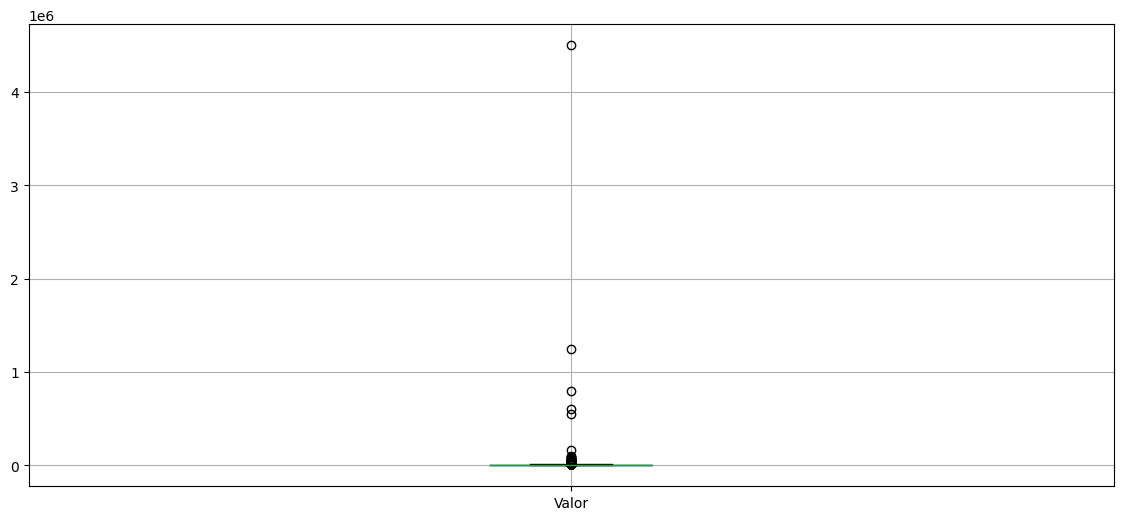

In [10]:
dados.boxplot(['Valor'])

In [72]:
alto_nivel = dados[dados.Valor >=1000]
valor = alto_nivel.Valor
#valor = dados.Valor

In [73]:
valor.info()

<class 'pandas.core.series.Series'>
Int64Index: 20220 entries, 0 to 21825
Series name: Valor
Non-Null Count  Dtype  
--------------  -----  
20220 non-null  float64
dtypes: float64(1)
memory usage: 315.9 KB


In [74]:
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
IIQ = q3-q1
limite_superior = q3 + 1.5 * IIQ
limite_inferior = q1 - 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = alto_nivel[selecao]

<Axes: >

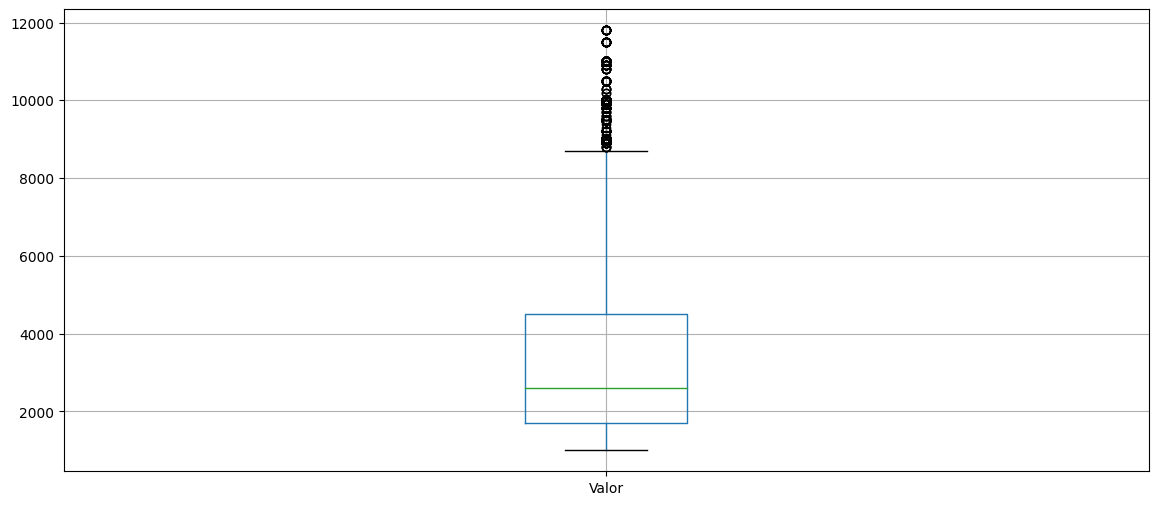

In [75]:
dados_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

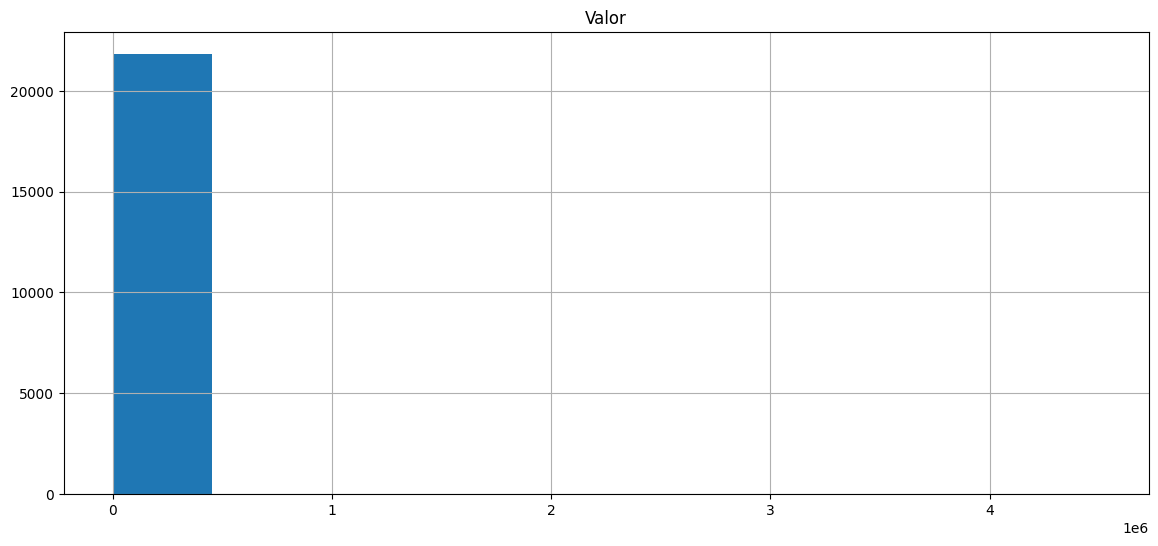

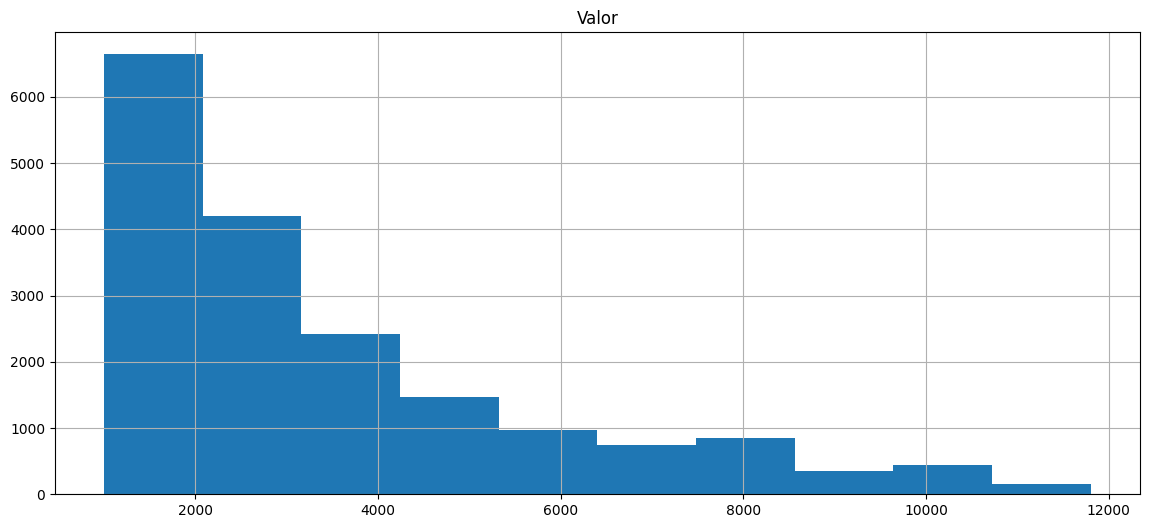

In [76]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

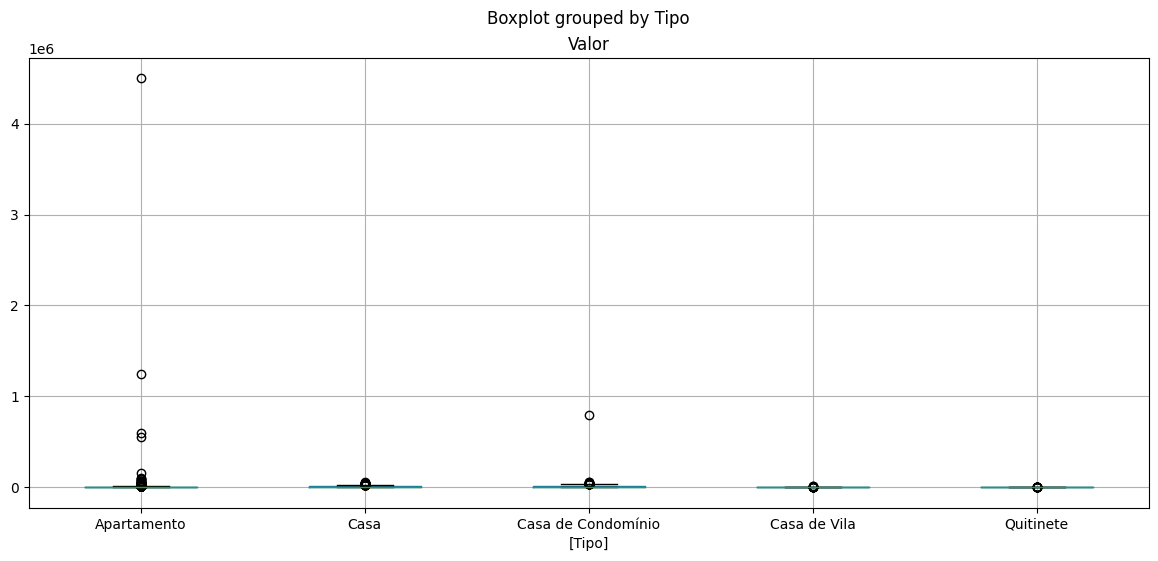

In [77]:
dados.boxplot(['Valor'], by=['Tipo'])

In [80]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [81]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [83]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [86]:
q1 = grupo_tipo.quantile(.25)
q3 = grupo_tipo.quantile(.75)
IIQ = q3-q1
limite_superior = q3 + 1.5 * IIQ
limite_inferior = q1 - 1.5 * IIQ



In [87]:
q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [88]:
q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [101]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [103]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [104]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [109]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [111]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

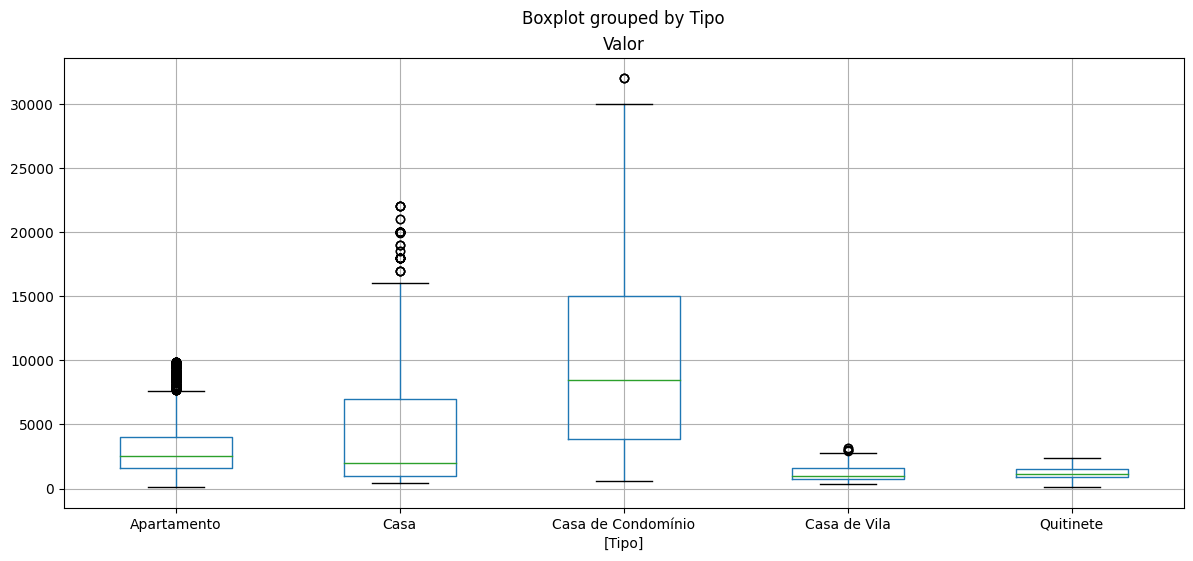

In [112]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [113]:
dados_new.to_csv('/content/drive/MyDrive/Alura ciencia de dados/Datascience/Python Pandas tratando e analisando dados/.aluguel_residencial_sem_outliers.csv')

# Apredendo mais com matplotlib

In [128]:
area = plt.figure()

<Figure size 1400x600 with 0 Axes>

In [129]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

In [130]:
g1.scatter(dados.Valor,dados.Area)
g1.set_title('Valor x Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra Valor')

grupo = dados.groupby('Tipo')['Valor']
g4.bar(grupo.mean().index,grupo.mean().values)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

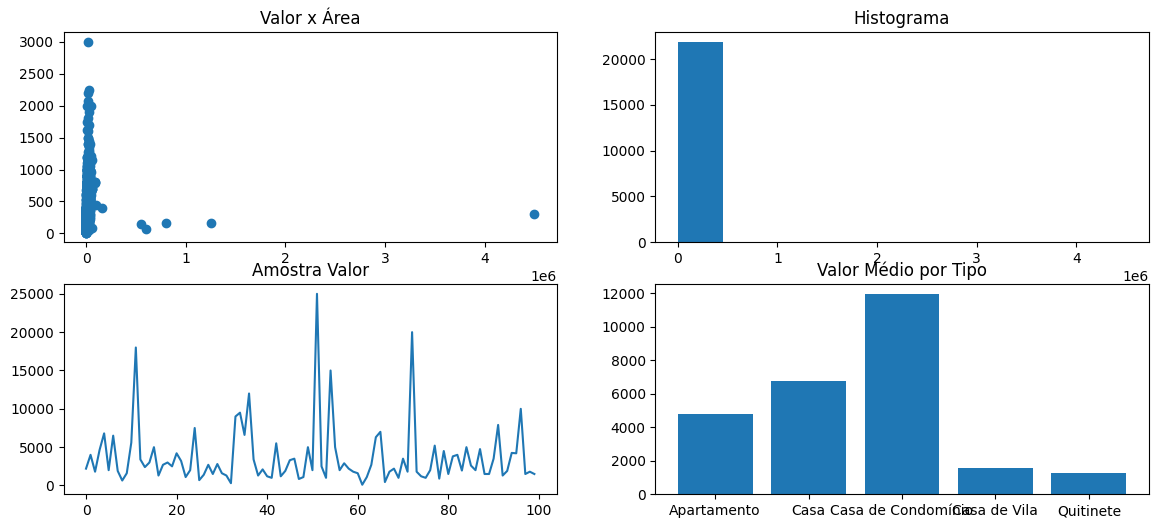

In [131]:
area

In [120]:
dados_g3 = dados.Valor.sample(100)
dados_g3

4165      1100.0
16294    16000.0
9270      1400.0
14640     1000.0
1061      1700.0
          ...   
12145     2950.0
18201    10000.0
14629     1300.0
2097      4650.0
188       1800.0
Name: Valor, Length: 100, dtype: float64

In [127]:
area = ''

In [132]:
# salvando grafico
area.savefig('/content/drive/MyDrive/Alura ciencia de dados/Datascience/Python Pandas tratando e analisando dados/.grafico.png',dpi = 300, bbox_inches='tight')

Criando Grafico de pizza

In [137]:
df = pd.read_csv('/content/drive/MyDrive/Alura ciencia de dados/Datascience/Python Pandas tratando e analisando dados/aluguel_amostra.csv', sep = ';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

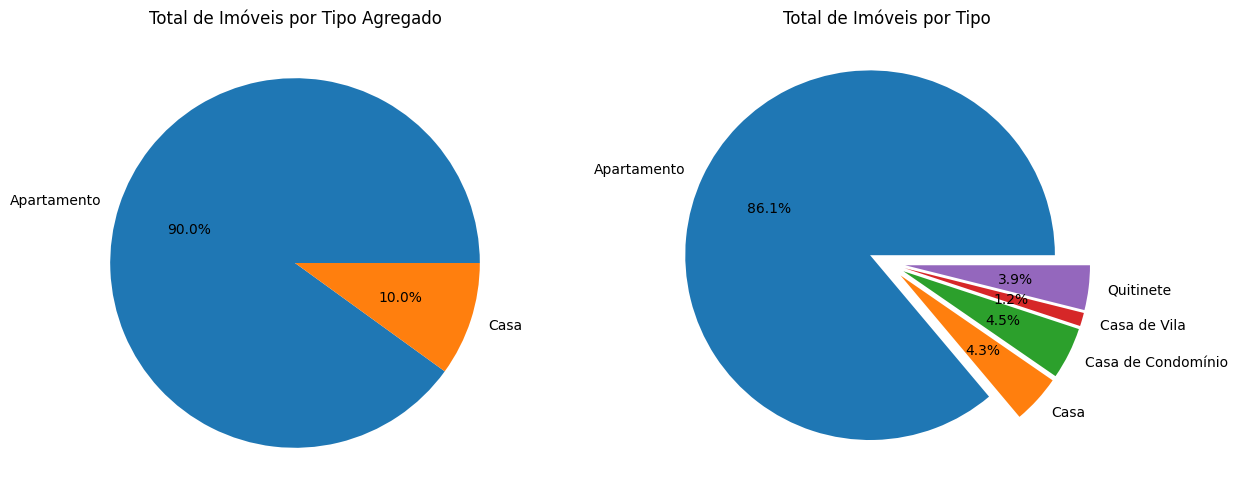

In [138]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = df.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = df.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')